# Project 1

    We begin by loading the data

In [29]:
%matplotlib inline 
import numpy as np   # generic stuff
import matplotlib.pyplot as plt

#### REMOVE THIS LINE BEFORE SUBMISSION
import pandas as pd
#######################################################################

from lib.proj1_helpers import * #the helper provided for the project
from lib.costs import *

# choose which implementations you would like
from lib.implementations import *
#from implementations import * #our implementations of the functions done by us


import datetime
from helpers import * #helpers of exo 2
# Useful starting lines

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
DATA_FOLDER = 'data/'

y_train, tx_train, ids_train = load_csv_data(DATA_FOLDER+'train.csv',sub_sample=False)

y_test, tx_test, ids_test = load_csv_data(DATA_FOLDER+'test.csv',sub_sample=False)
AAA = 0;

note that here we are only considering a sub_sample as the "True" value indicates

In [31]:
y_train

array([ 1., -1., -1., ...,  1., -1., -1.])

In [32]:
ids_train
np.mean(tx_train,axis=0)

array([ -4.90230794e+01,   4.92398193e+01,   8.11819816e+01,
         5.78959617e+01,  -7.08420675e+02,  -6.01237051e+02,
        -7.09356603e+02,   2.37309984e+00,   1.89173324e+01,
         1.58432217e+02,   1.43760943e+00,  -1.28304708e-01,
        -7.08985189e+02,   3.87074191e+01,  -1.09730480e-02,
        -8.17107200e-03,   4.66602072e+01,  -1.95074680e-02,
         4.35429640e-02,   4.17172345e+01,  -1.01191920e-02,
         2.09797178e+02,   9.79176000e-01,  -3.48329567e+02,
        -3.99254314e+02,  -3.99259788e+02,  -6.92381204e+02,
        -7.09121609e+02,  -7.09118631e+02,   7.30645914e+01])

In [33]:
# illegal: 
pd.DataFrame(tx_train).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2.0,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1.0,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1.0,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


### Helper functions

In [34]:
def replace_999_median(tx):
    nan_values = (tx==-999)*1
    for col in range(tx.shape[1]):
        column = tx[:,col][tx[:,col]!=-999]
        median = np.median(column)
        tx[:,col][tx[:,col]==-999] = median
    return tx, nan_values

def replace_999_mean(tx):
    nan_values = (tx==-999)*1
    for col in range(tx.shape[1]):
        column = tx[:,col][tx[:,col]!=-999]
        median = np.median(column)
        tx[:,col][tx[:,col]==-999] = median
    return tx, nan_values

def add_ones(tx):
    return np.concatenate((np.ones([tx.shape[0],1]),tx), axis=1)

def standardize(x):
    """Standardize the original data set."""
    mean_x = np.mean(x, axis=0)
    x = x - mean_x
    std_x = np.std(x, axis=0)
    x = x / std_x
    return x, mean_x, std_x

In [35]:


tx_train, nan_values_train = replace_999_median(tx_train)
tx_test, nan_values_test = replace_999_median(tx_test)



In [36]:
tx_train = standardize(tx_train)
tx_train = tx_train[0]
tx_test = standardize(tx_test)
tx_test = tx_test[0]

In [37]:
if (AAA!=1):
    tx_train = add_ones(tx_train)
    tx_test = add_ones(tx_test)
    AAA = 1


In [38]:
np.mean(tx_train,axis=0)

array([  1.00000000e+00,   9.27252671e-13,   4.50019089e-15,
        -3.48448848e-15,   7.19675786e-15,  -3.68138116e-12,
         2.13543213e-12,   5.95433581e-13,   2.16429719e-14,
         6.39742126e-15,   2.86409207e-15,  -7.00447966e-15,
         4.45924897e-15,   4.29197803e-12,  -5.96492045e-15,
         1.35646161e-16,   7.13136217e-17,   2.58030370e-14,
        -1.06327391e-16,  -1.87188487e-16,   8.24369382e-15,
         1.41040513e-16,  -9.00283004e-15,  -6.01698247e-16,
        -2.95741174e-12,   1.46076658e-15,   2.17857554e-14,
        -4.93485594e-12,   5.44553736e-15,  -2.56949984e-15,
        -8.76751116e-16])

In [39]:
tx_train.shape

(250000, 31)

In [72]:
initial_w = np.zeros(tx_train.shape[1])
initial_w.shape

(31,)

In [41]:
gamma = 0.05
max_iters = 1000
lambda_ = 0.5

# Methods

### Functions for methods: 

In [42]:
def func_least_squares (y, tx, test_set, fct='mse'):
    name = 'least_squares'
    w,loss = least_squares(y,tx,fct)
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, name)
    
    plt.plot(w, 'go')
    plt.title('least squares weights for loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

def func_GD (y, tx, test_set, max_iters, gamma, initial_w):
    name = 'Gradient_descent'
    w,loss = least_squares_GD(y, tx, initial_w, max_iters, gamma,fct='mse');
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, name)
    
    plt.plot(w, 'go')
    plt.title('GD: weights with loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

########################  RIDGE REGRESSION #######################################################
def func_ridge_regression (y, tx, test_set, lambda_):
    name = 'Ridge_regression'
    
    w,loss = ridge_regression(y, tx, lambda_=lambda_, fct='mse');
    
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, name)
    
    plt.plot(w, 'go')
    plt.title('Ridge regression: weights ;loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

## *LEAST-SQUARES

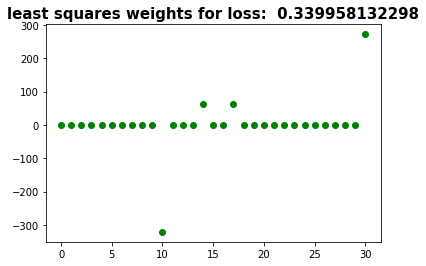

In [43]:
w, loss = func_least_squares (y=y_train, tx=tx_train, test_set=tx_test, fct='mse');


In [44]:
y_pred_train = predict_labels(w, tx_train)
right_train = np.sum(y_pred_train == y_train)/len(y_train)*100
right_train

74.499200000000002

## *Gradient descent     -------------------------------------------------------------------------------

Gradient Descent(0/499): loss=0.5000000000000249, w0=-0.031466400000014945, w1=0.002504206625732244
Gradient Descent(1/499): loss=0.4494343967425655, w0=-0.0597861600000126, w1=0.004438498929019952
Gradient Descent(2/499): loss=0.4237550966541934, w0=-0.08527394400001406, w1=0.006020285830294936
Gradient Descent(3/499): loss=0.4070187761061894, w0=-0.108212949600019, w1=0.0072840399711404345
Gradient Descent(4/499): loss=0.3951946905073953, w0=-0.12885805464002748, w1=0.008234547940797575
Gradient Descent(5/499): loss=0.38648993849775537, w0=-0.14743864917603822, w1=0.008883836358338948
Gradient Descent(6/499): loss=0.3798896347830327, w0=-0.16416118425845092, w1=0.009255089133456313
Gradient Descent(7/499): loss=0.37476690775624144, w0=-0.17921146583262498, w1=0.009378902879218826
Gradient Descent(8/499): loss=0.37071472549275486, w0=-0.19275671924938384, w1=0.00928903699482596
Gradient Descent(9/499): loss=0.3674580691602446, w0=-0.20494744732446882, w1=0.009019283091522143
Gradient 

Gradient Descent(84/499): loss=0.3422815271281734, w0=-0.31462340613947704, w1=-0.014230514893322001
Gradient Descent(85/499): loss=0.34222929851464656, w0=-0.3146274655255905, w1=-0.014136678728657745
Gradient Descent(86/499): loss=0.34217837159151865, w0=-0.31463111897309287, w1=-0.014039009360607143
Gradient Descent(87/499): loss=0.34212870956692654, w0=-0.3146344070758452, w1=-0.013937673544359494
Gradient Descent(88/499): loss=0.3420802768523936, w0=-0.31463736636832257, w1=-0.013832832892408138
Gradient Descent(89/499): loss=0.3420330390166304, w0=-0.3146400297315524, w1=-0.01372464402478169
Gradient Descent(90/499): loss=0.3419869627414883, w0=-0.3146424267584595, w1=-0.013613258714729596
Gradient Descent(91/499): loss=0.3419420157799274, w0=-0.3146445840826761, w1=-0.013498824030005345
Gradient Descent(92/499): loss=0.3418981669158857, w0=-0.3146465256744712, w1=-0.013381482469887074
Gradient Descent(93/499): loss=0.3418553859259397, w0=-0.31464827310708704, w1=-0.0132613720980

Gradient Descent(167/499): loss=0.34036514448383137, w0=-0.31466399353542746, w1=-0.0023722689867191013
Gradient Descent(168/499): loss=0.3403572570889932, w0=-0.3146639941819584, w1=-0.0022392353163259225
Gradient Descent(169/499): loss=0.3403495342979599, w0=-0.31466399476383633, w1=-0.002107072051088
Gradient Descent(170/499): loss=0.3403419724774923, w0=-0.31466399528752653, w1=-0.001975784246089955
Gradient Descent(171/499): loss=0.3403345680806975, w0=-0.3146639957588478, w1=-0.0018453765342193655
Gradient Descent(172/499): loss=0.340327317644765, w0=-0.31466399618303703, w1=-0.0017158531399853452
Gradient Descent(173/499): loss=0.3403202177887653, w0=-0.3146639965648074, w1=-0.0015872178929527423
Gradient Descent(174/499): loss=0.3403132652115199, w0=-0.31466399690840086, w1=-0.0014594742408023378
Gradient Descent(175/499): loss=0.3403064566895287, w0=-0.31466399721763505, w1=-0.0013326252620270804
Gradient Descent(176/499): loss=0.34029978907496017, w0=-0.31466399749594587, w1=

Gradient Descent(250/499): loss=0.34004813705605696, w0=-0.31466399999974703, w1=0.005728892312674654
Gradient Descent(251/499): loss=0.3400466662613513, w0=-0.31466399999985034, w1=0.005794061348196355
Gradient Descent(252/499): loss=0.34004522384158087, w0=-0.3146639999999433, w1=0.005858594767136622
Gradient Descent(253/499): loss=0.3400438092250343, w0=-0.31466400000002703, w1=0.0059224978059226035
Gradient Descent(254/499): loss=0.34004242185190625, w0=-0.3146640000001024, w1=0.005985775687963906
Gradient Descent(255/499): loss=0.34004106117404187, w0=-0.31466400000017025, w1=0.006048433622663741
Gradient Descent(256/499): loss=0.34003972665468096, w0=-0.3146640000002313, w1=0.006110476804469093
Gradient Descent(257/499): loss=0.34003841776821264, w0=-0.3146640000002863, w1=0.006171910411958805
Gradient Descent(258/499): loss=0.3400371339999343, w0=-0.31466400000033584, w1=0.006232739606968469
Gradient Descent(259/499): loss=0.34003587484581566, w0=-0.3146640000003804, w1=0.006292

Gradient Descent(334/499): loss=0.33998591064383965, w0=-0.3146640000007901, w1=0.009442469540272162
Gradient Descent(335/499): loss=0.3399856036714238, w0=-0.31466400000079014, w1=0.009470207971867366
Gradient Descent(336/499): loss=0.33998530205707567, w0=-0.3146640000007902, w1=0.009497660962744838
Gradient Descent(337/499): loss=0.33998500569805107, w0=-0.31466400000079026, w1=0.009524831435306618
Gradient Descent(338/499): loss=0.33998471449363443, w0=-0.3146640000007903, w1=0.009551722284631423
Gradient Descent(339/499): loss=0.33998442834509773, w0=-0.31466400000079037, w1=0.009578336378645021
Gradient Descent(340/499): loss=0.33998414715566055, w0=-0.3146640000007904, w1=0.009604676558292157
Gradient Descent(341/499): loss=0.33998387083045145, w0=-0.3146640000007905, w1=0.009630745637709917
Gradient Descent(342/499): loss=0.3399835992764677, w0=-0.31466400000079053, w1=0.009656546404402448
Gradient Descent(343/499): loss=0.3399833324025394, w0=-0.3146640000007906, w1=0.00968208

Gradient Descent(417/499): loss=0.33997202195890325, w0=-0.3146640000007897, w1=0.010996914488601803
Gradient Descent(418/499): loss=0.3399719403421877, w0=-0.3146640000007897, w1=0.011008725512990364
Gradient Descent(419/499): loss=0.3399718598487338, w0=-0.31466400000078965, w1=0.011020417113148773
Gradient Descent(420/499): loss=0.33997178045833576, w0=-0.3146640000007896, w1=0.011031990544818987
Gradient Descent(421/499): loss=0.3399717021511722, w0=-0.31466400000078953, w1=0.011043447050436675
Gradient Descent(422/499): loss=0.33997162490779986, w0=-0.3146640000007895, w1=0.01105478785926525
Gradient Descent(423/499): loss=0.33997154870914603, w0=-0.3146640000007894, w1=0.011066014187528835
Gradient Descent(424/499): loss=0.33997147353650115, w0=-0.31466400000078937, w1=0.01107712723854413
Gradient Descent(425/499): loss=0.3399713993715112, w0=-0.3146640000007893, w1=0.011088128202851173
Gradient Descent(426/499): loss=0.3399713261961724, w0=-0.31466400000078926, w1=0.011099018258

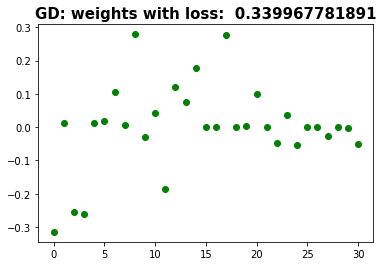

In [45]:
w, loss = func_GD (y=y_train, tx=tx_train, test_set=tx_test, max_iters=500,gamma=0.1, initial_w=initial_w);


In [46]:
w.shape
tx_train.shape

(250000, 31)

In [47]:
y_pred_train = predict_labels(w, tx_train)
right_train = np.sum(y_pred_train == y_train)/len(y_train)*100
right_train

74.495599999999996

## *Ridge regression    -------------------------------------------------------------------------------

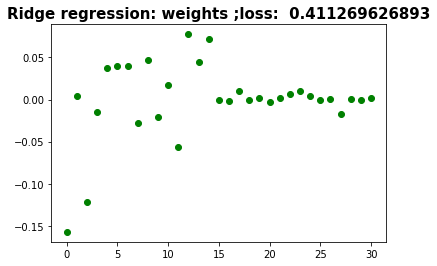

In [48]:
func_ridge_regression (y=y_train, tx=tx_train, test_set=tx_test, lambda_=lambda_);

## * SGD -------------------------------------------------------------------------------------------------

In [49]:
def func_SGD (y, tx, test_set, max_iters, gamma, initial_w, batch_size):
    name = 'Stochastic_Gradient_descent'
    
    w,loss = least_squares_SGD(y, tx, initial_w, max_iters,\
                               gamma, batch_size)
    
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, name)
    
    plt.plot(w, 'go')
    plt.title('SGD: weights with loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

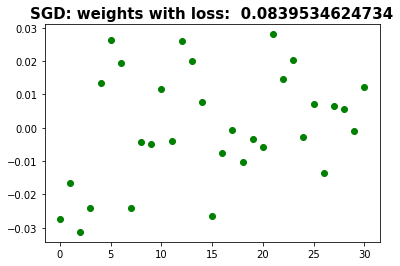

In [50]:
w, loss = func_SGD (y=y_train, tx=tx_train, test_set=tx_test, max_iters=10,gamma=gamma, initial_w=initial_w,\
                   batch_size=5);

In [81]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

def cross_validation_logistic_regression(y,tx, k_fold, max_iters, single_gamma):
    seed=1;
    # get k'th subgroup in test, others in train
    k_indices = build_k_indices(y, k_fold, seed)
    accuracy_train = np.zeros(k_fold)
    accuracy_test = np.zeros(k_fold)
    
    
    for k in range(k_fold):
        #print('----- FOLD', k, '-----')
        k_index = k_indices[k]
        test_y = y[k_index]
        test_tx = tx[k_index,:]

        mask = np.ones(len(y), dtype=bool) # set all elements to True
        mask[k_index] = False              # set test elements to False
        train_tx = tx[mask,:]              # select only True elements (ie train elements)
        train_y = y[mask]
        weights,loss = logistic_regression(train_y, train_tx, initial_w, max_iters, single_gamma)
        # Compute the predictions
        y_pred_train = predict_labels(weights, train_tx)
        y_pred_test = predict_labels(weights, test_tx)
        predictions=True;
        accuracy_train[k] = np.sum(y_pred_train == train_y)/len(train_y)
        accuracy_test[k] = np.sum(y_pred_test == test_y)/len(test_y)
        
    # Compute accuracy of the predictions
    
    return np.mean(accuracy_test)

In [82]:
np.exp(700)

1.0142320547350045e+304

In [84]:
gammas=np.linspace(0.000001,0.0001,10);
k_fold=2;
max_iters=100;
accuracy_test=np.zeros(len(gammas))
for i, single_gamma in enumerate(gammas):
        print('--- GAMMA', single_gamma, '---')
        accuracy_test[i]=cross_validation_logistic_regression(y_train,tx_train, k_fold, max_iters, single_gamma)
        print(accuracy_test[i])

--- GAMMA 1e-06 ---
lalala  0.0    0.0
lalala  1.26937971172    -1.06054210535
lalala  2.28036149877    -2.06977763005
lalala  3.09998134374    -3.03008148608
lalala  3.84337719936    -3.94611051615
lalala  4.49638931964    -4.82326116388
lalala  5.07901235316    -5.66683669619
lalala  5.60605261321    -6.48167503712
lalala  6.08869996614    -7.27201831047
lalala  6.53555905817    -8.04151723994
lalala  6.95333948731    -8.79329192345
lalala  7.34733298537    -9.5300038569
lalala  7.7217529443    -10.2539231734
lalala  8.07998156183    -10.9669873807
lalala  8.42475310741    -11.6708515298
lalala  8.7582919315    -12.3669306885
lalala  9.08241774332    -13.0564357822
lalala  9.39862679637    -13.7404038184
lalala  9.70815507913    -14.7153125136
lalala  10.0120279018    -15.6834786175
lalala  10.3110990948    -16.6410072088
lalala  10.6060822026    -17.5881665465
lalala  10.8975754629    -18.5253081071
lalala  11.1860819206    -19.4528356868
lalala  11.4720257115    -20.3711827365
lala

lalala  29.4556614251    -74.1323491322
lalala  32.5679600684    -82.9854553301
lalala  35.6723364392    -91.7838006982
lalala  38.7689611763    -100.534556178
lalala  41.8585914071    -109.243504804
lalala  44.942130246    -117.91568122
lalala  48.0204488062    -126.555557758
lalala  51.094323347    -135.167109371
lalala  54.164421799    -143.753853419
lalala  57.2313103401    -152.318885852
lalala  60.295466721    -160.864917764
lalala  63.3572944646    -169.394312632
lalala  66.4171356289    -177.909123549
lalala  69.4752814807    -186.411129379
lalala  72.531981145    -194.901868885
lalala  75.587448534    -203.382672103
lalala  78.6418679061    -211.854688593
lalala  81.6953983611    -220.318912451
lalala  84.7481775169    -228.776204196
lalala  87.8003245564    -237.227309729
lalala  90.8519427836    -245.672876679
lalala  93.9031217912    -254.113468408
lalala  96.9539393151    -262.549576006
lalala  100.0    -270.981628528
lalala  100.0    -279.410001732
lalala  100.0    -287.8

lalala  100.0    -815.147958366
lalala  100.0    -831.187195181
lalala  100.0    -847.226132351
lalala  100.0    -863.264784594
lalala  100.0    -879.303165355
lalala  100.0    -895.341286942
lalala  100.0    -911.379160637
lalala  100.0    -927.416796801
lalala  100.0    -943.454204974
lalala  100.0    -959.491393957
lalala  100.0    -975.52837189
lalala  100.0    -991.565146323
lalala  100.0    -1007.60172428
lalala  100.0    -1023.6381123
lalala  100.0    -1039.67431652
lalala  100.0    -1055.71034268
lalala  100.0    -1071.74619621
lalala  100.0    -1087.78188219
lalala  100.0    -1103.81740549
lalala  100.0    -1119.85277069
lalala  100.0    -1135.88798218
lalala  100.0    -1151.92304414
lalala  100.0    -1167.9579606
lalala  100.0    -1183.9927354
lalala  100.0    -1200.02737226
lalala  100.0    -1216.06187477
lalala  100.0    -1232.09624639
lalala  100.0    -1248.13049049
lalala  100.0    -1264.16461033
lalala  100.0    -1280.19860909
lalala  100.0    -1296.23248986
lalala  100.

lalala  57.6477329258    -92.1349286503
lalala  68.1150191967    -116.047799317
lalala  79.1161496377    -139.717618531
lalala  90.113009849    -163.268425839
lalala  100.0    -186.735041716
lalala  100.0    -210.139944048
lalala  100.0    -233.498899419
lalala  100.0    -256.823081033
lalala  100.0    -280.120477326
lalala  100.0    -303.396895097
lalala  100.0    -326.656634121
lalala  100.0    -349.902938532
lalala  100.0    -373.138300651
lalala  100.0    -396.364666383
lalala  100.0    -419.583575661
lalala  100.0    -442.7962607
lalala  100.0    -466.003716729
lalala  100.0    -489.206754212
lalala  100.0    -512.406038112
lalala  100.0    -535.602117782
lalala  100.0    -558.795449943
lalala  100.0    -581.986416492
lalala  100.0    -605.175338437
lalala  100.0    -628.362486897
lalala  100.0    -651.548091857
lalala  100.0    -674.732349198
lalala  100.0    -697.915426388
lalala  100.0    -721.097467108
lalala  100.0    -744.278595051
lalala  100.0    -767.458917033
lalala  100

lalala  100.0    -1781.69003317
lalala  100.0    -1812.35667013
lalala  100.0    -1843.02332993
lalala  100.0    -1873.69001124
lalala  100.0    -1904.35671261
lalala  100.0    -1935.02343253
lalala  100.0    -1965.69016943
lalala  100.0    -1996.35692168
lalala  100.0    -2027.02368762
lalala  100.0    -2057.69046558
lalala  100.0    -2088.35725385
lalala  100.0    -2119.02405072
lalala  100.0    -2149.6908545
lalala  100.0    -2180.35766348
lalala  100.0    -2211.02447598
lalala  100.0    -2241.69129032
lalala  100.0    -2272.35810486
lalala  100.0    -2303.02491797
lalala  100.0    -2333.69172806
lalala  100.0    -2364.35853356
lalala  100.0    -2395.02533294
lalala  100.0    -2425.6921247
lalala  100.0    -2456.35890739
lalala  100.0    -2487.02567958
lalala  100.0    -2517.69243991
lalala  100.0    -2548.35918701
lalala  100.0    -2579.02591961
lalala  100.0    -2609.69263645
lalala  100.0    -2640.3593363
lalala  100.0    -2671.02601802
lalala  100.0    -2701.69268046
lalala  100

lalala  100.0    -635.854816664
lalala  100.0    -682.204326075
lalala  100.0    -728.593477651
lalala  100.0    -775.012075355
lalala  100.0    -821.453206661
lalala  100.0    -867.912418274
lalala  100.0    -914.386935836
lalala  100.0    -960.875014825
lalala  100.0    -1007.37548203
lalala  100.0    -1053.88745494
lalala  100.0    -1100.41018795
lalala  100.0    -1146.94299575
lalala  100.0    -1193.48521948
lalala  100.0    -1240.03621547
lalala  100.0    -1286.59535477
lalala  100.0    -1333.16202754
lalala  100.0    -1379.73564868
lalala  100.0    -1426.31566312
lalala  100.0    -1472.9015499
lalala  100.0    -1519.49282494
lalala  100.0    -1566.08904227
lalala  100.0    -1612.68979421
lalala  100.0    -1659.29471035
lalala  100.0    -1705.90345595
lalala  100.0    -1752.51572966
lalala  100.0    -1799.13126098
lalala  100.0    -1845.74980748
lalala  100.0    -1892.37115206
lalala  100.0    -1938.99510019
lalala  100.0    -1985.62147731
lalala  100.0    -2032.25012643
lalala  1

lalala  100.0    -3776.77402917
lalala  100.0    -3831.08887863
lalala  100.0    -3885.40421453
lalala  100.0    -3939.71999997
lalala  100.0    -3994.03620023
lalala  100.0    -4048.35278264
lalala  100.0    -4102.66971647
lalala  100.0    -4156.98697293
lalala  100.0    -4211.30452497
lalala  100.0    -4265.62234729
lalala  100.0    -4319.94041621
lalala  100.0    -4374.2587096
lalala  100.0    -4428.5772068
lalala  100.0    -4482.89588857
lalala  100.0    -4537.21473699
lalala  100.0    -4591.53373538
lalala  100.0    -4645.85286828
lalala  100.0    -4700.17212135
lalala  100.0    -4754.49148132
lalala  100.0    -4808.81093594
lalala  100.0    -4863.13047389
lalala  100.0    -4917.45008478
lalala  100.0    -4971.76975905
lalala  100.0    -5026.08948797
lalala  100.0    -5080.40926353
lalala  100.0    -5134.72907847
lalala  100.0    -5189.04892617
lalala  100.0    -5243.36880066
lalala  100.0    -5297.68869656
lalala  100.0    -5352.00860903
lalala  100.0    -5406.32853378
lalala  10

lalala  100.0    -1703.02784877
lalala  100.0    -1763.64991057
lalala  100.0    -1824.27293311
lalala  100.0    -1884.89688739
lalala  100.0    -1945.52174499
lalala  100.0    -2006.14747796
lalala  100.0    -2066.77405884
lalala  100.0    -2127.4014606
lalala  100.0    -2188.0296566
lalala  100.0    -2248.65862052
lalala  100.0    -2309.28832631
lalala  100.0    -2369.91874815
lalala  100.0    -2430.54986034
lalala  100.0    -2491.18163728
lalala  100.0    -2551.81405346
lalala  100.0    -2612.44708341
lalala  100.0    -2673.0807017
lalala  100.0    -2733.714883
lalala  100.0    -2794.34960205
lalala  100.0    -2854.98483375
lalala  100.0    -2915.62055319
lalala  100.0    -2976.25673572
lalala  100.0    -3036.89335701
lalala  100.0    -3097.53039312
lalala  100.0    -3158.16782057
lalala  100.0    -3218.80561639
lalala  100.0    -3279.4437582
lalala  100.0    -3340.08222426
lalala  100.0    -3400.72099351
lalala  100.0    -3461.36004561
lalala  100.0    -3521.999361
lalala  100.0   

lalala  100.0    -5796.81089464
lalala  100.0    -5864.94647896
lalala  100.0    -5933.08207146
lalala  100.0    -6001.21766991
lalala  100.0    -6069.35327235
lalala  100.0    -6137.48887703
lalala  100.0    -6205.62448243
lalala  100.0    -6273.76008723
lalala  100.0    -6341.89569027
lalala  100.0    -6410.03129058
lalala  100.0    -6478.16688736
lalala  100.0    -6546.30247994
lalala  100.0    -6614.4380678
lalala  100.0    -6682.57365056
lalala  100.0    -6750.70922795
lalala  100.0    -6818.84479981
0.713604


## *LOGISTIC

In [ ]:
def func_logistic (y, tx, test_set, max_iters, gamma, initial_w):
    name = 'Logistic regression'
    
    #w,loss = logistic_regression(y, tx, initial_w, max_iters, gamma)
    w,loss = logistic_regression_mat (y, tx, initial_w, max_iters, gamma)
    
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, name)
    
    plt.plot(w, 'go')
    plt.title('logistic reg: weights with loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

In [ ]:
w, loss = func_logistic (y=y_train, tx=tx_train, test_set=tx_test, max_iters=50,\
                         gamma=0.0001, initial_w=initial_w);

In [76]:
y_pred_train = predict_labels(w, tx_train)
right_train = np.sum(y_pred_train == y_train)/len(y_train)*100
right_train

70.532399999999996